In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import *
import matplotlib as mp
import seaborn as sns

import numpy as np 
import matplotlib.pyplot as plt 

from matplotlib import cm 
from sklearn.utils.multiclass import unique_labels 
from sklearn.metrics.classification import _check_targets

In [53]:
dataset= pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv",sep=",")

In [54]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#Cleaning
dataset.Gender.isnull().sum()
dataset.Age.isnull().sum()
dataset.Height.isnull().sum()
dataset.Weight.isnull().sum()
dataset.family_history_with_overweight.isnull().sum()
dataset.FAVC.isnull().sum()
dataset.FCVC.isnull().sum()
dataset.NCP.isnull().sum()
dataset.CH2O.isnull().sum()
dataset.SCC.isnull().sum()
dataset.CALC.isnull().sum()
dataset.FAF.isnull().sum()
dataset.TUE.isnull().sum()
dataset.MTRANS.isnull().sum()
dataset.NObeyesdad.isnull().sum()

In [88]:
#Creating smaller tables of specified Obesity Type (for mean() calculus)
INS = dataset[dataset['NObeyesdad'] == 'Insufficient_Weight']
NORM = dataset[dataset['NObeyesdad'] == 'Normal_Weight']
OW1 = dataset[dataset['NObeyesdad'] == 'Overweight_Level_I']
OW2 = dataset[dataset['NObeyesdad'] == 'Overweight_Level_II']
OBS1 = dataset[dataset['NObeyesdad'] == 'Obesity_Type_I']
OBS2 = dataset[dataset['NObeyesdad'] == 'Obesity_Type_II']
OBS3 = dataset[dataset['NObeyesdad'] == 'Obesity_Type_III']

In [56]:
OBS3

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
202,Female,26.000000,1.560000,102.000000,yes,yes,3.0,3.0,Sometimes,yes,1.000000,no,0.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_III
344,Male,18.000000,1.870000,173.000000,yes,yes,3.0,3.0,Frequently,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_III
403,Female,26.000000,1.660000,112.000000,yes,no,3.0,3.0,Sometimes,no,3.000000,no,0.000000,0.000000,no,Automobile,Obesity_Type_III
498,Female,25.196214,1.686306,104.572712,yes,yes,3.0,3.0,Sometimes,no,1.152736,no,0.319156,1.000000,Sometimes,Public_Transportation,Obesity_Type_III
499,Female,18.503343,1.683124,126.673780,yes,yes,3.0,3.0,Sometimes,no,1.115967,no,1.541072,1.000000,Sometimes,Public_Transportation,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [57]:
dataset.groupby("NObeyesdad")["NObeyesdad"].count().sort_values()

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Overweight_Level_I     290
Overweight_Level_II    290
Obesity_Type_II        297
Obesity_Type_III       324
Obesity_Type_I         351
Name: NObeyesdad, dtype: int64

In [58]:
OBS3.Height.mean()

1.687559487654321

In [59]:
OBS1.mean()

Age       25.884941
Height     1.693804
Weight    92.870198
FCVC       2.186050
NCP        2.431862
CH2O       2.112218
FAF        0.986748
TUE        0.676743
dtype: float64

In [60]:
dataset.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


In [61]:
QUANTI_data = [dataset['Age'], dataset['Height'], dataset['Weight'], dataset['FCVC'], dataset['NCP'], dataset['CH2O'], dataset['FAF'], dataset['TUE'], dataset['NObeyesdad']]
QUANTI_headers = ['Age','Height','Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Class_Obesity']
QUANTI = pd.concat(QUANTI_data, axis = 1, keys = QUANTI_headers)

In [62]:
QUALI_data = [dataset['Gender'], dataset['family_history_with_overweight'], dataset['FAVC'], dataset['CAEC'], dataset['SMOKE'], dataset['SCC'], dataset['CALC'], dataset['MTRANS'], dataset['NObeyesdad']]
QUALI_headers = ['Gender','Hist_Ow','FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Class_Obesity']
QUALI = pd.concat(QUALI_data, axis = 1, keys = QUALI_headers)

In [63]:
QUALI

,Gender,Hist_Ow,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Class_Obesity
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [64]:
#Now working to transform the quantitative Yes/No columns into floats
def TransformYesNo(dataframe, column_name):
    column_nbr = dataframe.columns.get_loc(column_name)
    new_col = np.empty(len(dataframe[column_name]) , order = 'F')
    index = 0
    for line in dataframe[column_name]:
        if line == 'yes' or line == 1:
            new_col[index] = 1
        if line == 'no' or line == 0:
            new_col[index] = 0
        index += 1
    dataframe[column_name] = new_col

In [65]:
#Now working to transform the qualitative No/Sometimes/Frequently/Always columns into floats
def TransformNSFA(dataframe, column_name):
    column_nbr = dataframe.columns.get_loc(column_name)
    new_col = np.zeros(len(dataframe[column_name]) , order = 'F')
    index = 0
    for line in dataframe[column_name]:
        if (line == 'no' or line == 0):
            new_col[index] = 0
        elif(line == 'Always' or line == 1):
            new_col[index] = 1
        elif(line == 'Frequently' or line == 0.67):
            new_col[index] = 0.67
        elif(line == 'Sometimes' or line == 0.33):
            new_col[index] = 0.33
        index += 1
    dataframe[column_name] = new_col

In [66]:
def TransformMTRANS(dataframe):# 1 is Yes and 0 is No
    column_nbr = dataframe.columns.get_loc("MTRANS")
    new_col = np.zeros(len(dataframe["MTRANS"]) , order = 'F')
    index = 0
    for k in range(len(dataframe)) :# Minimum Physical activity is a average of 30 min/day 
        if ((dataset[k:k+1].MTRANS == 'Public_Transportation').bool()):#Around 15 min /day
            if((dataset[k:k+1].FAF>=2).bool()):# 60 min/day average physical training
                new_col[index] = 1
            else :
                new_col[index] = 0
        elif((dataset[k:k+1].MTRANS == 'Walking').bool()):
            new_col[index] = 1 
        elif((dataset[k:k+1].MTRANS == 'AUtomobile').bool()):
            if((dataset[k:k+1].FAF>=3).bool()):
                new_col[index] = 1
            else :
                new_col[index] = 0
        elif((dataset[k:k+1].MTRANS == 'Motorbike').bool()):
            if((dataset[k:k+1].FAF>=3).bool()):
                new_col[index] = 1
            else :
                new_col[index] = 0
        elif((dataset[k:k+1].MTRANS == 'Bike').bool()):
            new_col[index] = 1
        index += 1
    dataframe["Minimum_physical_activity"] = new_col

In [85]:
TransformYesNo(dataset, 'family_history_with_overweight')
TransformYesNo(dataset, 'FAVC')
TransformYesNo(dataset, 'SMOKE')
TransformYesNo(dataset, 'SCC')
TransformNSFA(dataset, 'CAEC')
TransformNSFA(dataset, 'CALC')
TransformMTRANS(dataset)

In [86]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Minimum_physical_activity
0,1.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,0.33,0.0,2.0,0.0,0.0,1.0,0.00,Public_Transportation,Normal_Weight,0.0
1,1.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,0.33,1.0,3.0,1.0,3.0,0.0,0.33,Public_Transportation,Normal_Weight,1.0
2,0.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,0.33,0.0,2.0,0.0,2.0,1.0,0.67,Public_Transportation,Normal_Weight,1.0
3,0.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,0.33,0.0,2.0,0.0,2.0,0.0,0.67,Walking,Overweight_Level_I,1.0
4,0.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,0.33,0.0,2.0,0.0,0.0,0.0,0.33,Public_Transportation,Overweight_Level_II,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,21.0,1.71,131.4,1.0,1.0,3.0,3.0,0.33,0.0,2.0,0.0,2.0,1.0,0.33,Public_Transportation,Obesity_Type_III,1.0
2107,1.0,22.0,1.75,133.7,1.0,1.0,3.0,3.0,0.33,0.0,2.0,0.0,1.0,1.0,0.33,Public_Transportation,Obesity_Type_III,0.0
2108,1.0,23.0,1.75,133.7,1.0,1.0,3.0,3.0,0.33,0.0,2.0,0.0,1.0,1.0,0.33,Public_Transportation,Obesity_Type_III,0.0
2109,1.0,24.0,1.74,133.3,1.0,1.0,3.0,3.0,0.33,0.0,3.0,0.0,1.0,1.0,0.33,Public_Transportation,Obesity_Type_III,0.0


In [69]:
QUALI.mean()

Hist_Ow                      0.817622
FAVC                         0.883941
CAEC                         0.377826
SMOKE                        0.020843
SCC                          0.045476
CALC                         0.241701
Minimum_physical_activity    0.142586
dtype: float64

In [70]:
def MoyenneParamCategorie(nom_param):
    m1 = INS[nom_param].mean()
    m2 = NORM[nom_param].mean()
    m3 = OW1[nom_param].mean()
    m4 = OW2[nom_param].mean()
    m5 = OBS1[nom_param].mean()
    m6 = OBS2[nom_param].mean()
    m7 = OBS3[nom_param].mean()
    return [m1,m2,m3,m4,m5,m6,m7]

In [71]:
def Normalize(dataset):
    dataset['Age'] = round(dataset['Age'])
    #Taille à 2 chiffres après la virgule
    dataset['Height'] = round(dataset['Height'],2)
    #Poids à 1 chiffre après la virgule
    dataset['Weight'] = round(dataset['Weight'],1)
    dataset['CH2O'] = round(dataset['CH2O'])
    dataset['FAF'] = round(dataset['FAF'])    
    dataset['TUE'] = round(dataset['TUE'])
Normalize(dataset)

In [ ]:
INS = dataset[dataset['NObeyesdad'] == 'Insufficient_Weight']
NORM = dataset[dataset['NObeyesdad'] == 'Normal_Weight']
OW1 = dataset[dataset['NObeyesdad'] == 'Overweight_Level_I']
OW2 = dataset[dataset['NObeyesdad'] == 'Overweight_Level_II']
OBS1 = dataset[dataset['NObeyesdad'] == 'Obesity_Type_I']
OBS2 = dataset[dataset['NObeyesdad'] == 'Obesity_Type_II']
OBS3 = dataset[dataset['NObeyesdad'] == 'Obesity_Type_III']

<BarContainer object of 7 artists>

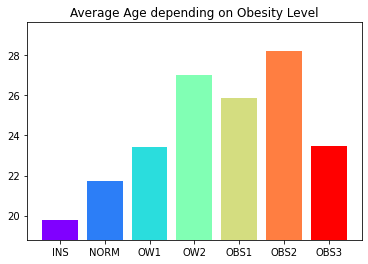

In [72]:
plt.figure(1)
MoyAge = MoyenneParamCategorie('Age')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoyAge)*0.95,max(MoyAge)*1.05))
#plt.ylabel("Average Age")
#plt.xlabel("Obesity Level")
plt.title("Average Age depending on Obesity Level")
plt.bar(ObesityLevels, MoyAge, color = cm.rainbow(np.linspace(0,1,7)))

<BarContainer object of 7 artists>

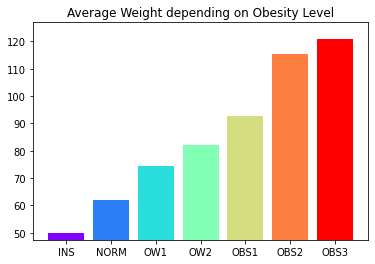

In [73]:
plt.figure(2)
MoyWei = MoyenneParamCategorie('Weight')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoyWei)*0.95,max(MoyWei)*1.05))
#plt.ylabel("Average Weight")
#plt.xlabel("Obesity Level")
plt.title("Average Weight depending on Obesity Level")
plt.bar(ObesityLevels, MoyWei, color = cm.rainbow(np.linspace(0,1,7)))

<BarContainer object of 7 artists>

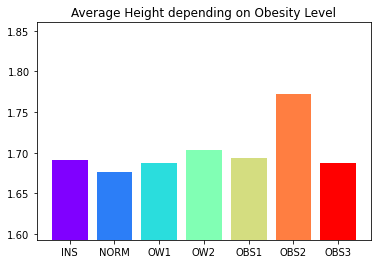

In [74]:
plt.figure(3)
MoyHei = MoyenneParamCategorie('Height')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoyHei)*0.95,max(MoyHei)*1.05))
#plt.ylabel("Average Height")
#plt.xlabel("Obesity Level")
plt.title("Average Height depending on Obesity Level")
plt.bar(ObesityLevels, MoyHei, color = cm.rainbow(np.linspace(0,1,7)))

<BarContainer object of 7 artists>

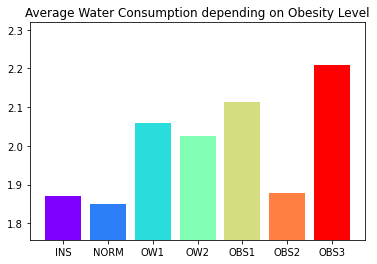

In [75]:
plt.figure(4)
MoyH2O = MoyenneParamCategorie('CH2O')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoyH2O)*0.95,max(MoyH2O)*1.05))
#plt.ylabel("Average Water Consumption")
#plt.xlabel("Obesity Level")
plt.title("Average Water Consumption depending on Obesity Level")
plt.bar(ObesityLevels, MoyH2O, color = cm.rainbow(np.linspace(0,1,7)))

In [76]:
#Now working to transform the quantitative Yes/No columns into floats
def TransformFemaleMale(dataframe, column_name):
    column_nbr = dataframe.columns.get_loc(column_name)
    new_col = np.empty(len(dataframe[column_name]) , order = 'F')
    index = 0
    for line in dataframe[column_name]:
        if line == 'Female' or line == 1:
            new_col[index] = 1
        if line == 'Male' or line == 0:
            new_col[index] = 0
        index += 1
    dataframe[column_name] = new_col
TransformFemaleMale(dataset,'Gender')

In [77]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1.0,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0.0,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,0.0,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,0.0,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,21.0,1.71,131.4,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2107,1.0,22.0,1.75,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2108,1.0,23.0,1.75,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2109,1.0,24.0,1.74,133.3,yes,yes,3.0,3.0,Sometimes,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


<BarContainer object of 7 artists>

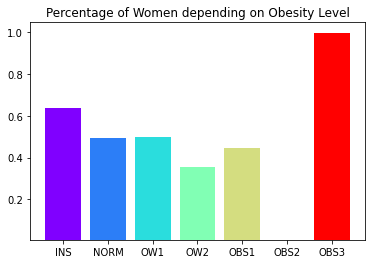

In [80]:
plt.figure(5)
MoyG = MoyenneParamCategorie('Gender')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoyG)*0.95,max(MoyG)*1.05))
#plt.ylabel("Percentage of Women")
#plt.xlabel("Obesity Level")
plt.title("Percentage of Women depending on Obesity Level")
plt.bar(ObesityLevels, MoyG, color = cm.rainbow(np.linspace(0,1,7)))

<BarContainer object of 7 artists>

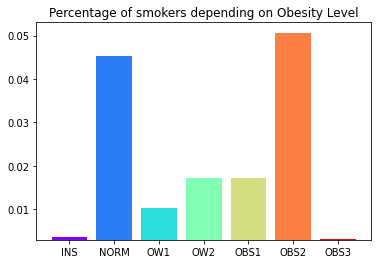

In [89]:
plt.figure(6)
MoySmoke = MoyenneParamCategorie('SMOKE')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoySmoke)*0.95,max(MoySmoke)*1.05))
plt.title("Percentage of smokers depending on Obesity Level")
plt.bar(ObesityLevels, MoySmoke, color = cm.rainbow(np.linspace(0,1,7)))

([<matplotlib.axis.XTick at 0x1176e8a90>,
 [Text(0, 0, 'INS'),
  Text(0, 0, 'NORM'),
  Text(0, 0, 'OW1'),
  Text(0, 0, 'OW2'),
  Text(0, 0, 'OBS1'),
  Text(0, 0, 'OBS2'),
  Text(0, 0, 'OBS3')])

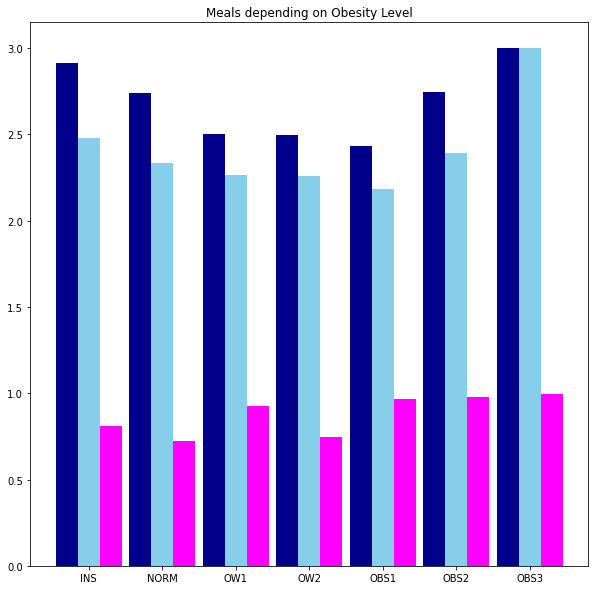

In [106]:
plt.figure(7,figsize =(10,10))
MoyMeals = MoyenneParamCategorie('NCP')
MoyHMeals = MoyenneParamCategorie('FAVC')
MoyLMeals = MoyenneParamCategorie('FCVC')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((0,max(MoyMeals)*1.05))
plt.title("Meals depending on Obesity Level")
bar1 = np.arange(7)
x1 = [i-0.3 for i in bar1]
x2 = [i+0.3 for i in bar1]
plt.bar(x1, MoyMeals, color = 'darkblue', width = 0.3, label = 'Number of Meals')
plt.bar(x2, MoyHMeals, color = 'fuchsia', width = 0.3, label = 'Caloric Food Frequency')
plt.bar(bar1, MoyLMeals, color = 'skyblue', width = 0.3, label = 'Vegetables Frequency')
plt.xticks(bar1,ObesityLevels)

<BarContainer object of 7 artists>

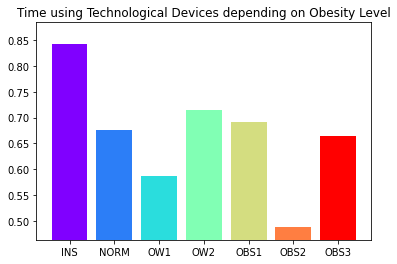

In [107]:
plt.figure(8)
MoyTech = MoyenneParamCategorie('TUE')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoyTech)*0.95,max(MoyTech)*1.05))
plt.title("Time using Technological Devices depending on Obesity Level")
plt.bar(ObesityLevels, MoyTech, color = cm.rainbow(np.linspace(0,1,7)))

<BarContainer object of 7 artists>

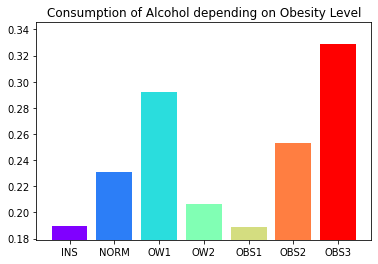

In [109]:
plt.figure(9)
MoyAlco = MoyenneParamCategorie('CALC')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoyAlco)*0.95,max(MoyAlco)*1.05))
plt.title("Consumption of Alcohol depending on Obesity Level")
plt.bar(ObesityLevels, MoyAlco, color = cm.rainbow(np.linspace(0,1,7)))

<BarContainer object of 7 artists>

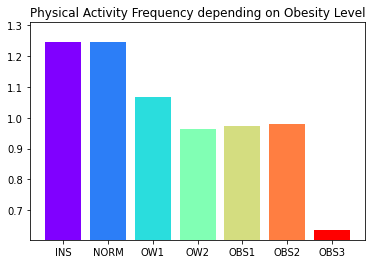

In [111]:
plt.figure(10)
MoySp = MoyenneParamCategorie('FAF')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoySp)*0.95,max(MoySp)*1.05))
plt.title("Physical Activity Frequency depending on Obesity Level")
plt.bar(ObesityLevels, MoySp, color = cm.rainbow(np.linspace(0,1,7)))

<BarContainer object of 7 artists>

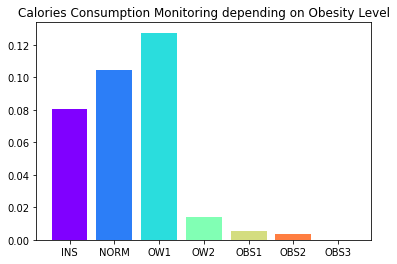

In [112]:
plt.figure(11)
MoyQAL = MoyenneParamCategorie('SCC')
ObesityLevels = ['INS','NORM','OW1','OW2','OBS1','OBS2','OBS3']
plt.ylim((min(MoyQAL)*0.95,max(MoyQAL)*1.05))
plt.title("Calories Consumption Monitoring depending on Obesity Level")
plt.bar(ObesityLevels, MoyQAL, color = cm.rainbow(np.linspace(0,1,7)))

In [ ]:
OBS3an=OBS3.groupby("family_history_with_overweight")["family_history_with_overweight"].count().sort_values()
OBS2an=OBS2.groupby("family_history_with_overweight")["family_history_with_overweight"].count().sort_values()
OBS1an=OBS1.groupby("family_history_with_overweight")["family_history_with_overweight"].count().sort_values()
OW1an=OW1.groupby("family_history_with_overweight")["family_history_with_overweight"].count().sort_values()
OW2an=OW2.groupby("family_history_with_overweight")["family_history_with_overweight"].count().sort_values()
NWan=NORM.groupby("family_history_with_overweight")["family_history_with_overweight"].count().sort_values()
UWan=INS.groupby("family_history_with_overweight")["family_history_with_overweight"].count().sort_values()
ber=dataset.groupby("FAVC")["FAVC"].count().sort_values()

In [ ]:
rer=dataset.groupby("Weight")["Height"].count().sort_values()
rer.plot()
dataSerie = pd.Series(dataset.MTRANS)
dataSerie.sort_values()
x = dataSerie.value_counts()
x = x.sort_index()
title="Age prediction :a  multi-class classification problem"
x.plot(kind="bar", title=title)

In [ ]:
dataSerie = pd.Series(dataset.MTRANS)
dataSerie.sort_values()
x = dataSerie.value_counts()
x = x.sort_index()
title="Age prediction :a  multi-class classification problem"
x.plot(kind="bar", title=title)

In [ ]:
list_var=dataset.columns.drop("NObeyesdad")
Y = dataset.NObeyesdad
X = dataset[list_var]

reg=svm.LinearSVC()
reg.fit(X,Y)

In [ ]:
rer=dataset.drop(columns="MTRANS")
list_var=rer.columns.drop("NObeyesdad")
Y = rer.NObeyesdad
X = rer[list_var]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
X, Y, test_size=0.33, random_state=42)
reg=tree.DecisionTreeClassifier()
reg.fit(X_train,Y_train)

In [ ]:
tree.DecisionTreeClassifier()

In [ ]:
reg.predict(X_test)

In [ ]:
reg.score(X_test,Y_test)
plt.plot(Y_test, reg.predict(X_test),'g')
plt.figure(figsize=(300,20))
sns.countplot( reg.predict(X_test))

In [ ]:
[Y,reg.predict(X_test)]

In [ ]:
list_var=rer.columns.drop("NObeyesdad")
Y = rer.NObeyesdad
X = rer[list_var]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
X, Y)
reg=ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0).fit(X_train, Y_train)
reg.predict(X_test)

In [ ]:
sns.scatterplot(Y_test, reg.predict(X_test))


In [ ]:
list_var=rer.columns.drop("NObeyesdad")
Y = rer.NObeyesdad
X = rer[list_var]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
X, Y)
reg=ensemble.RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
reg.predict(X_test)
reg.score(X_test,Y_test)

In [ ]:
k=reg.predict(X_test)
len(k)

In [ ]:
Comparing=[]
for j in range(len(k)):
        Comparing.append([str(Y_test[j:j+1].item()),k[j],j])
    
Comparing

In [ ]:
df=pd.DataFrame(Comparing,columns=['Y_test','Predict',''])
df=df.pivot_table(index=["Predict"],columns= ["Y_test"],values=[""],aggfunc="count", 
                           fill_value=0 
)
df

In [ ]:
sns.heatmap(df,annot=True,fmt='d',vmin=0,vmax=80,linewidths=.5,cmap="YlGnBu",square=True)
